In [65]:
# Libraries import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [66]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

In [67]:
non_numeric_columns = ['club_name', 'league_name', 'nationality_name']
# Perform one-hot encoding on non-numeric columns
encoded_data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

x = encoded_data.drop(columns= 'value_eur')
y = encoded_data['value_eur']

encoded_data

,position,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_contract_valid_until,preferred_foot,...,nationality_name_Uganda,nationality_name_Ukraine,nationality_name_United Arab Emirates,nationality_name_United States,nationality_name_Uruguay,nationality_name_Uzbekistan,nationality_name_Venezuela,nationality_name_Wales,nationality_name_Zambia,nationality_name_Zimbabwe
0,1,93,93,78000000.0,320000.0,34,170,72,2023.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,92,92,119500000.0,270000.0,32,185,81,2023.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,91,91,45000000.0,270000.0,36,187,83,2023.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,91,91,129000000.0,270000.0,29,175,68,2025.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,91,91,125500000.0,350000.0,30,181,70,2025.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17036,2,47,52,70000.0,1000.0,22,180,64,2021.0,1,...,0,0,0,0,0,0,0,0,0,0
17037,2,47,59,110000.0,500.0,19,175,70,2021.0,1,...,0,0,0,0,0,0,0,0,0,0
17038,2,47,55,100000.0,500.0,21,178,72,2021.0,1,...,0,0,0,0,0,0,0,0,0,0
17039,1,47,60,110000.0,500.0,19,173,66,2021.0,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.3, random_state=0
)

In [69]:
lr = LinearRegression()
lr.fit(x_train, y_train)
 
c = lr.intercept_
c

7644854939193.64

In [70]:
m = lr.coef_
m

array([ 1.41431151e+05,  2.93379795e+05,  4.92661561e+04,  2.84319367e+02,
       -3.23917120e+05,  3.26194679e+04, -1.45087715e+04,  2.83784135e+05,
       -1.24439939e+05,  4.53100359e+04, -4.85549689e+04,  2.24378226e+06,
        2.37381881e+05,  1.18342218e+05, -1.60819915e+05, -1.71742776e+05,
        1.62113059e+05,  2.41469172e+04, -2.87311905e+04,  2.89728532e+04,
        7.98742046e+04, -2.12421990e+04,  4.81269282e+04,  1.35856519e+04,
       -8.42843958e+04,  9.18484093e+03,  1.08360979e+04,  2.16267592e+04,
       -8.17951934e+04, -5.14092335e+04, -6.14616676e+04, -2.74283188e+04,
        1.96120679e+04,  1.43634918e+04,  2.56826770e+04, -4.31128863e+03,
        1.36494080e+04,  2.90275982e+04,  2.57479520e+04,  4.58233208e+03,
       -1.39853353e+04,  9.58754963e+03,  4.70554507e+04,  4.80949174e+03,
       -1.06786029e+04,  1.84586785e+03, -1.37857922e+04,  3.28705819e+02,
       -4.64702657e+12, -4.76073765e+12, -4.64702577e+12,  6.65701351e+05,
       -4.64702590e+12, -

In [71]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([  419800.96777344,  4796284.52441406,  2419359.9296875 , ...,
        1527641.57226562,  3374014.72167969, 14012123.93359375])

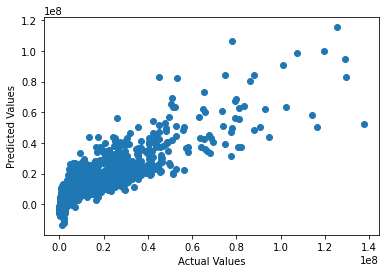

In [72]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [73]:
r2_score(y_train, y_pred_train)

0.793015865931115

In [74]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([ 396478.68652344,  193689.10546875, 1016361.91015625, ...,
        342361.6171875 , 1730110.61328125, -856407.11132812])

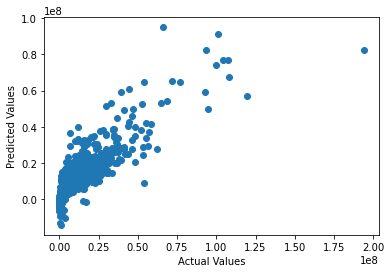

In [75]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [76]:
r2_score(y_test, y_pred_test)

0.7675777743202911